### PROBLEM 5.1
A data mining routine has been applied to a transaction dataset
and has classified 88 records as fraudulent (30 correctly so) and
952 as non-fraudulent (920 correctly so). Construct the
confusion matrix and calculate the overall error rate.

In [331]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [332]:
import pandas as pd
  
data = {'Predicted 0': [920, 32],
        'Predicted 1': [58, 30]}
conf_matrix_df = pd.DataFrame(data)

In [333]:
conf_matrix_df.loc['Total'] = conf_matrix_df.sum()

In [334]:
print("Confusion Matrix")
conf_matrix_df

Confusion Matrix


,Predicted 0,Predicted 1
0,920,58
1,32,30
Total,952,88


In [335]:
error_rate = (32 + 58)/1040

print("Error Rate = ", round(error_rate,4))

Error Rate =  0.0865


### PROBLEM 5.4
Consider Figure 5.12, the decile lift chart for the transaction data
model, applied to new data.
- a. Interpret the meaning of the first and second bars from the
left.
- b. Explain how you might use this information in practice.
- c. Another analyst comments that you could improve the
accuracy of the model by classifying everything as
nonfraudulent. If you do that, what is the error rate?
- d. Comment on the usefulness, in this situation, of these two
metrics of model performance (error rate and lift).

a) The first bar on the left of our decile lift chart represents the 10% of the records that are most likely to be fraudulent, on the y-axis of the chart we can see the factor by which our model outperforms a random assignment, so we can conclude that choosing records from this decile (first on the left) will, on average, result in having over 6 times more "fraudulent" than randomly choosing records from our whole database. Choosing records from the second bar from the left, however, will lead on average to twice as many "fraudulent" than a random selection from our dataset.

b) This information can be especially useful in situations where time and budget are limited and a high "response" rate is particularly important. For example, if we are looking for tax-cheaters but our resources only allow us to examine 20% of a database, we should choose the records to examine from the records that are more likely to be "fraudulent".

c) If we classify everything as "non fraudulent" we get an error rate of 62/1040 = 0.0596 --> 5.96%.

d) In the second situation the error rate is actually lower but this model has little value for classification of new data, the error rate now depends uniquely on the number of frauds in the dataset. After classifying all the records as "non fraudulent" we could use the decile lift chart created earlier to separate the part of the database where it is less likely to find cheaters and choose from it the records to analyze to obtain an even lower error rate. 

### PROBLEM 5.7
Table 5.7 shows a small set of predictive model validation results
for a classification model, with both actual values and
propensities.
- a. Calculate error rates, sensitivity, and specificity using
cutoffs of 0.25, 0.5, and 0.75.
- b. Create a decile lift chart.

In [336]:
data = {'Propensity_of_1': [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21, 0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
        'Actual': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]}
classification_df = pd.DataFrame(data)

In [337]:
classification_df

,Propensity_of_1,Actual
0,0.03,0
1,0.52,0
2,0.38,0
3,0.82,1
4,0.33,0
5,0.42,0
6,0.55,1
7,0.59,0
8,0.09,0
9,0.21,0


a)

In [338]:
#cutoff 0.25

Predicted = [1 if p > 0.25 else 0 for p in classification_df.Propensity_of_1]
cm = classificationSummary(classification_df.Actual, Predicted, class_names=['0', '1'])

#cutoff 0.50

Predicted = [1 if p > 0.5 else 0 for p in classification_df.Propensity_of_1]
classificationSummary(classification_df.Actual, Predicted, class_names=['0', '1'])

#cutoff 0.75

Predicted = [1 if p > 0.75 else 0 for p in classification_df.Propensity_of_1]
classificationSummary(classification_df.Actual, Predicted, class_names=['0', '1'])

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 9 8
     1 0 3
Confusion Matrix (Accuracy 0.9000)

       Prediction
Actual  0  1
     0 15  2
     1  0  3
Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1
     0 17  0
     1  1  2


In [339]:
sensitivity1 = 3/3
specificity1 = 9/17
sensitivity2 = 3/3
specificity2 = 15/17
sensitivity3 = 2/3
specificity3 = 17/17

print('cutoff 0.25', 'sensitivity = ', sensitivity1, 'specificity = ', round(specificity1,2))
print('cutoff 0.50', 'sensitivity = ', sensitivity2, 'specificity = ', round(specificity2,2))
print('cutoff 0.75', 'sensitivity = ', round(sensitivity3,2), 'specificity = ', specificity3)

cutoff 0.25 sensitivity =  1.0 specificity =  0.53
cutoff 0.50 sensitivity =  1.0 specificity =  0.88
cutoff 0.75 sensitivity =  0.67 specificity =  1.0


b) decile lift chart

In [340]:
sort_df = classification_df.sort_values(by=['Propensity_of_1'], ascending=False)
sort_df

,Propensity_of_1,Actual
3,0.82,1
15,0.79,1
7,0.59,0
6,0.55,1
1,0.52,0
10,0.43,0
16,0.42,0
5,0.42,0
2,0.38,0
4,0.33,0


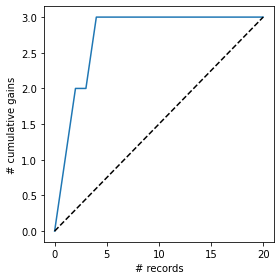

In [341]:
gainsChart(sort_df.Actual, figsize=(4, 4))

plt.tight_layout()
plt.show()

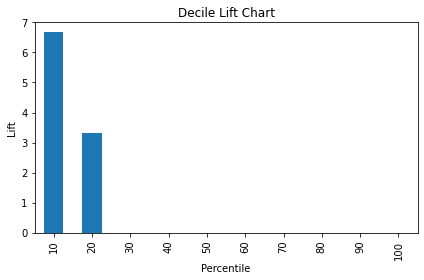

In [342]:
liftChart(sort_df.Actual, labelBars=False)
plt.tight_layout()
plt.show()

### PROBLEM 9.1
Competitive Auctions on eBay.com. The file eBayAuctions.csv contains information on 1972
auctions that transacted on eBay.com during May–June 2004. The goal is to use these data to build
a model that will classify auctions as competitive or noncompetitive. A competitive auction is
defined as an auction with at least two bids placed on the item auctioned. The data include variables
that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that
the seller selected (auction duration, opening price, currency, day-of-week of auction close). In
addition, we have the price at which the auction closed. The task is to predict whether or not the
auction will be competitive.
Data Preprocessing. Convert variable Duration into a categorical variable. Split the data into
training (60%) and validation (40%) datasets.
- a. Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of
records in a terminal node to 50 and the maximum tree depth to 7. Write down the results in
terms of rules. (Note: If you had to slightly reduce the number of predictors due to software
limitations, or for clarity of presentation, which would be a good variable to choose?)
- b. Is this model practical for predicting the outcome of a new auction?
- c. Describe the interesting and uninteresting information that these rules provide.
- d. Fit another classification tree (using a tree with a minimum number of records per terminal
node = 50 and maximum depth = 7), this time only with predictors that can be used for
predicting the outcome of a new auction. Describe the resulting tree in terms of rules. Make
sure to report the smallest set of rules required for classification.

a)

In [343]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [344]:
ebay_df_original = pd.read_csv("eBayAuctions.csv")

In [345]:
ebay_df_original

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [346]:
#replace eventual spaces in the column names with underscores
ebay_df_original.columns = [s.strip().replace('?', '') 
   for s in ebay_df_original.columns]

In [347]:
ebay_df_original

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [348]:
ebay_df_original.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [349]:
# use drop_first=True to drop the first dummy variable
ebay_df = pd.get_dummies(ebay_df_original, drop_first=True)
ebay_df.columns
ebay_df.head(5)

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,Category_SportingGoods,Category_Toys/Hobbies,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [350]:
#divide "duration" in bins

ebay_df['Duration_Bins'] = pd.cut(ebay_df['Duration'], bins=3, labels=['Short', 'Medium', 'Long'])

In [351]:
ebay_df

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,Category_Toys/Hobbies,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_Bins
0,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
1,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
2,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
3,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
4,3249,5,0.01,0.01,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,2992,5,359.95,359.95,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,Medium
1968,21,5,610.00,300.00,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Medium
1969,1400,5,549.00,549.00,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
1970,57,7,820.00,650.00,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Medium


In [352]:
#count of unique values in each variable
ebay_df.nunique()

sellerRating                     461
Duration                           5
ClosePrice                       827
OpenPrice                        291
Competitive                        2
Category_Automotive                2
Category_Books                     2
Category_Business/Industrial       2
Category_Clothing/Accessories      2
Category_Coins/Stamps              2
Category_Collectibles              2
Category_Computer                  2
Category_Electronics               2
Category_EverythingElse            2
Category_Health/Beauty             2
Category_Home/Garden               2
Category_Jewelry                   2
Category_Music/Movie/Game          2
Category_Photography               2
Category_Pottery/Glass             2
Category_SportingGoods             2
Category_Toys/Hobbies              2
currency_GBP                       2
currency_US                        2
endDay_Mon                         2
endDay_Sat                         2
endDay_Sun                         2
e

In [353]:
#drop "Duration" to only keep "Duration_Bins"

ebay_df2=ebay_df.drop('Duration', axis=1)

ebay_df2

,sellerRating,ClosePrice,OpenPrice,Competitive,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,Category_Toys/Hobbies,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_Bins
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,2992,359.95,359.95,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,Medium
1968,21,610.00,300.00,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,Medium
1969,1400,549.00,549.00,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,Medium
1970,57,820.00,650.00,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Medium


In [354]:
# convert "Duration_Bins" in 2 dummy variables, use drop_first=True to drop the first dummy variable

ebay_df2 = pd.get_dummies(ebay_df2, drop_first=True)
ebay_df2.columns
ebay_df2.head(5)

,sellerRating,ClosePrice,OpenPrice,Competitive,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_Bins_Medium,Duration_Bins_Long
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [355]:
#define predictors and target variable

X=ebay_df2.drop(columns=['Competitive'])
y=ebay_df2['Competitive']

In [356]:
#partition the data into training and validation

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [357]:
train_X

,sellerRating,ClosePrice,OpenPrice,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,...,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_Bins_Medium,Duration_Bins_Long
503,578,4.93,2.45,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
733,2349,5.61,3.60,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
383,884,2.45,2.45,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
725,2349,5.50,3.60,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
310,104,3.07,1.23,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2427,33.95,33.95,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1096,2046,7.50,7.50,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1932,534,154.23,79.99,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
235,1853,1.23,1.23,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [358]:
#fit a first classification tree with just one split

classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(x, y)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [359]:
classTree.classes_ = ['Non Competitive','Competitive']
print(classTree.classes_)

['Non Competitive', 'Competitive']


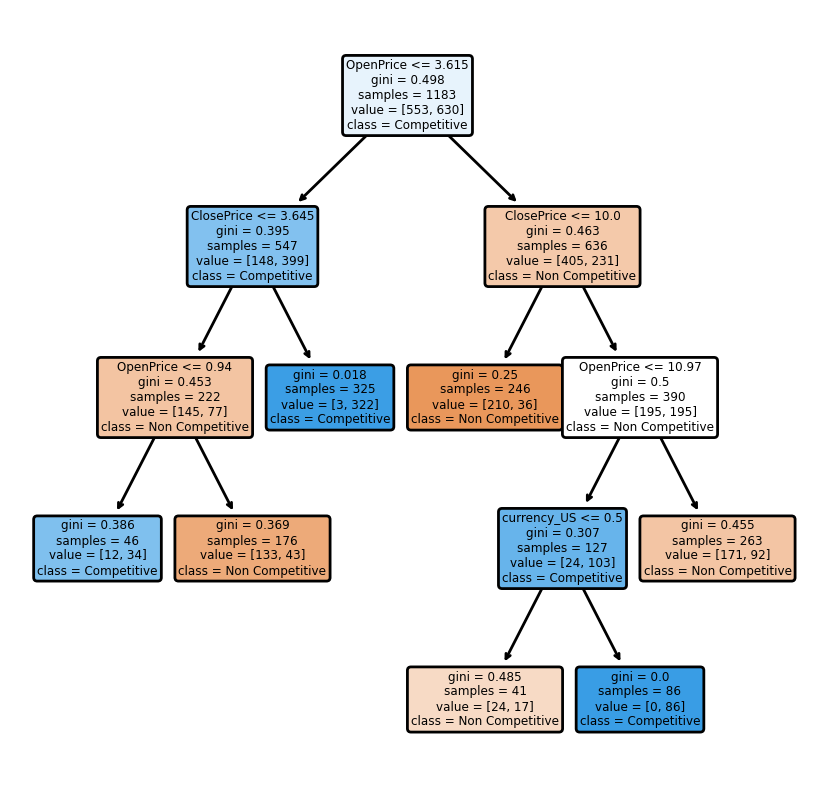

In [360]:
smallClassTree = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

#plotDecisionTree(smallClassTree, feature_names=train_X.columns)
# Set dpi (100 - 300) to make image clearer than default

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)

tree.plot_tree(smallClassTree,
           feature_names = train_X.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

The rules used for the classification are:
- OpenPrice <= 3.615, ClosePrice >3.645 <b>Competitive</b>
- OpenPrice <= 0.94, ClosePrice <= 3.645 <b>Competitive</b>
- 0.94 < OpenPrice <= 3.615, ClosePrice <= 3.645 <b>Non Competitive</b>
- OpenPrice > 3.615, ClosePrice <= 10.0 <b>Non Competitive</b>
- OpenPrice > 10.97, ClosePrice > 10 <b>Non Competitive</b>
- 3.65 > OpenPrice <= 10.97, ClosePrice > 10.0, Currency_US <= 0.5 <b>Non Competitive</b>
- 3.65 > OpenPrice <= 10.97, ClosePrice > 10.0, Currency_US > 0.5 <b>Competitive</b>

d)

In [361]:
X=ebay_df2[['sellerRating', 'Duration_Bins_Medium', 'Duration_Bins_Long', 'ClosePrice', 'OpenPrice']]
y=ebay_df2[['Competitive']]

In [362]:
#partition the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [363]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(x, y)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [364]:
classTree.classes_ = ['Non Competitive','Competitive']
print(classTree.classes_)

['Non Competitive', 'Competitive']


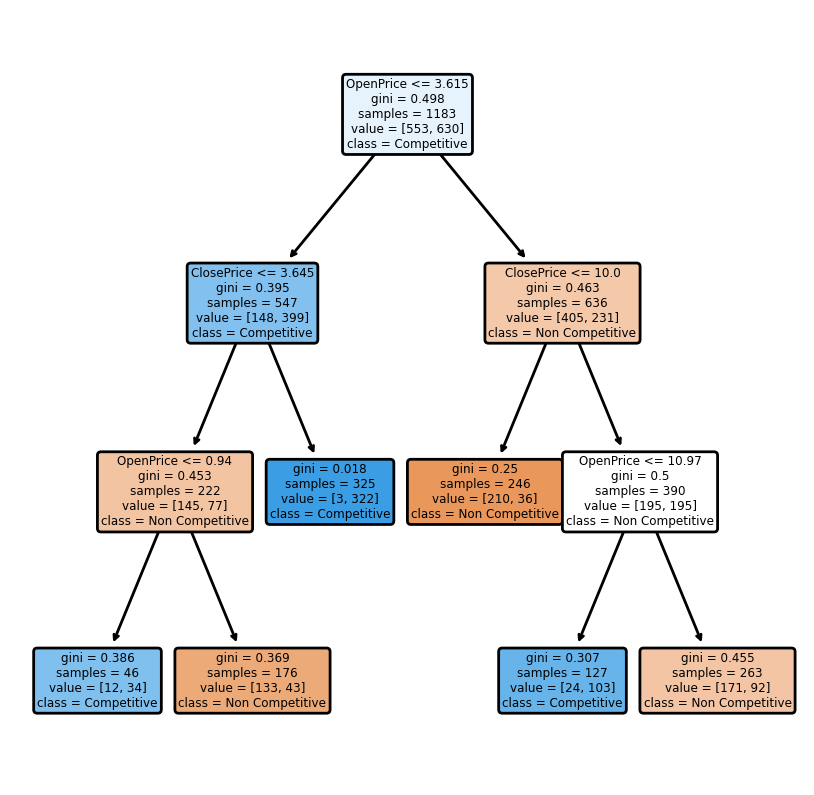

In [365]:
smallClassTree = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

#plotDecisionTree(smallClassTree, feature_names=train_X.columns)
                      # Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)

tree.plot_tree(smallClassTree,
           feature_names = train_X.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

This time the rules used for the classification are:
- OpenPrice <= 3.615, ClosePrice >3.645 <b>Competitive</b>
- OpenPrice <= 0.94, ClosePrice <= 3.645 <b>Competitive</b>
- 3.615 < OpenPrice > 10.97, ClosePrice > 10 <b>Competitive</b>
- 0.94 < OpenPrice <= 3.615, ClosePrice <= 3.645 <b>Non Competitive</b>
- OpenPrice > 3.615, ClosePrice <= 10.0 <b>Non Competitive</b>
- OpenPrice > 10.97, ClosePrice > 10 <b>Non Competitive</b>

### Problem 9.3.
Predicting Prices of Used Cars (Regression Trees). The file ToyotaCorolla.csv contains the
data on used cars (Toyota Corolla) on sale during late summer of 2004 in the Netherlands. It has
1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other
specifications. The goal is to predict the price of a used Toyota Corolla based on its specifications.
(The example in Section 9.7 is a subset of this dataset.)
Data Preprocessing. Split the data into training (60%), and validation (40%) datasets.

- a. Run a full-grown regression tree (RT) with outcome variable Price and predictors Age_08_04,
KM, Fuel_Type (first convert to dummies), HP, Automatic, Doors, Quarterly_Tax,
Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows,
Sport_Model, and Tow_Bar. Set random_state=1.
-- i. Which appear to be the three or four most important car specifications for predicting the
car’s price?
-- ii. Compare the prediction errors of the training and validation sets by examining their RMS
error and by plotting the two boxplots. How does the predictive performance of the
validation set compare to the training set? Why does this occur?
-- iii. How might we achieve better validation predictive performance at the expense of training
performance?
-- iv. Create a smaller tree by using GridSearchCV() with cv = 5 to find a fine-tuned tree.
Compared to the full-grown tree, what is the predictive performance on the validation set?


In [366]:
cars_df_original = pd.read_csv("ToyotaCorolla.csv")

cars_df_original

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [367]:
cars_df = cars_df_original[['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
'Sport_Model','Tow_Bar']]

In [368]:
cars_df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar
0,13500,23,46986,Diesel,90,0,3,210,0,3,0,0,0,1,0,0
1,13750,23,72937,Diesel,90,0,3,210,0,3,1,0,1,0,0,0
2,13950,24,41711,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
3,14950,26,48000,Diesel,90,0,3,210,1,3,0,0,0,0,0,0
4,13750,30,38500,Diesel,90,0,3,210,1,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,3,69,1,3,1,0,0,1,1,0
1432,10845,72,19000,Petrol,86,0,3,69,0,3,0,0,0,0,1,0
1433,8500,71,17016,Petrol,86,0,3,69,0,3,0,0,0,0,0,0
1434,7250,70,16916,Petrol,86,0,3,69,1,3,0,0,0,0,0,0


In [369]:
# use drop_first=True to drop the first dummy variable
cars_df = pd.get_dummies(cars_df, drop_first=True)
cars_df.columns
cars_df

,Price,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,1,0
1,13750,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,1,0
2,13950,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,1,0
3,14950,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,1,0
4,13750,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,3,69,1,3,1,0,0,1,1,0,0,1
1432,10845,72,19000,86,0,3,69,0,3,0,0,0,0,1,0,0,1
1433,8500,71,17016,86,0,3,69,0,3,0,0,0,0,0,0,0,1
1434,7250,70,16916,86,0,3,69,1,3,0,0,0,0,0,0,0,1


In [370]:
X=cars_df[['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows',
'Sport_Model','Tow_Bar','Fuel_Type_Diesel','Fuel_Type_Petrol']]
y=cars_df[['Price']]

In [371]:
#partition the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [372]:
#regTree = gridSearch.best_estimator_

In [373]:
#regression tree summary stats for training and validation
print("training summary")
regressionSummary(train_y, regTree.predict(train_X))

print("\nvalidation summary")
regressionSummary(valid_y, regTree.predict(valid_X))

training summary

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1082.6992
            Mean Absolute Error (MAE) : 786.5953
          Mean Percentage Error (MPE) : -0.9986
Mean Absolute Percentage Error (MAPE) : 7.6224

validation summary

Regression statistics

                      Mean Error (ME) : 24.8976
       Root Mean Squared Error (RMSE) : 1251.3861
            Mean Absolute Error (MAE) : 958.1684
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.5594


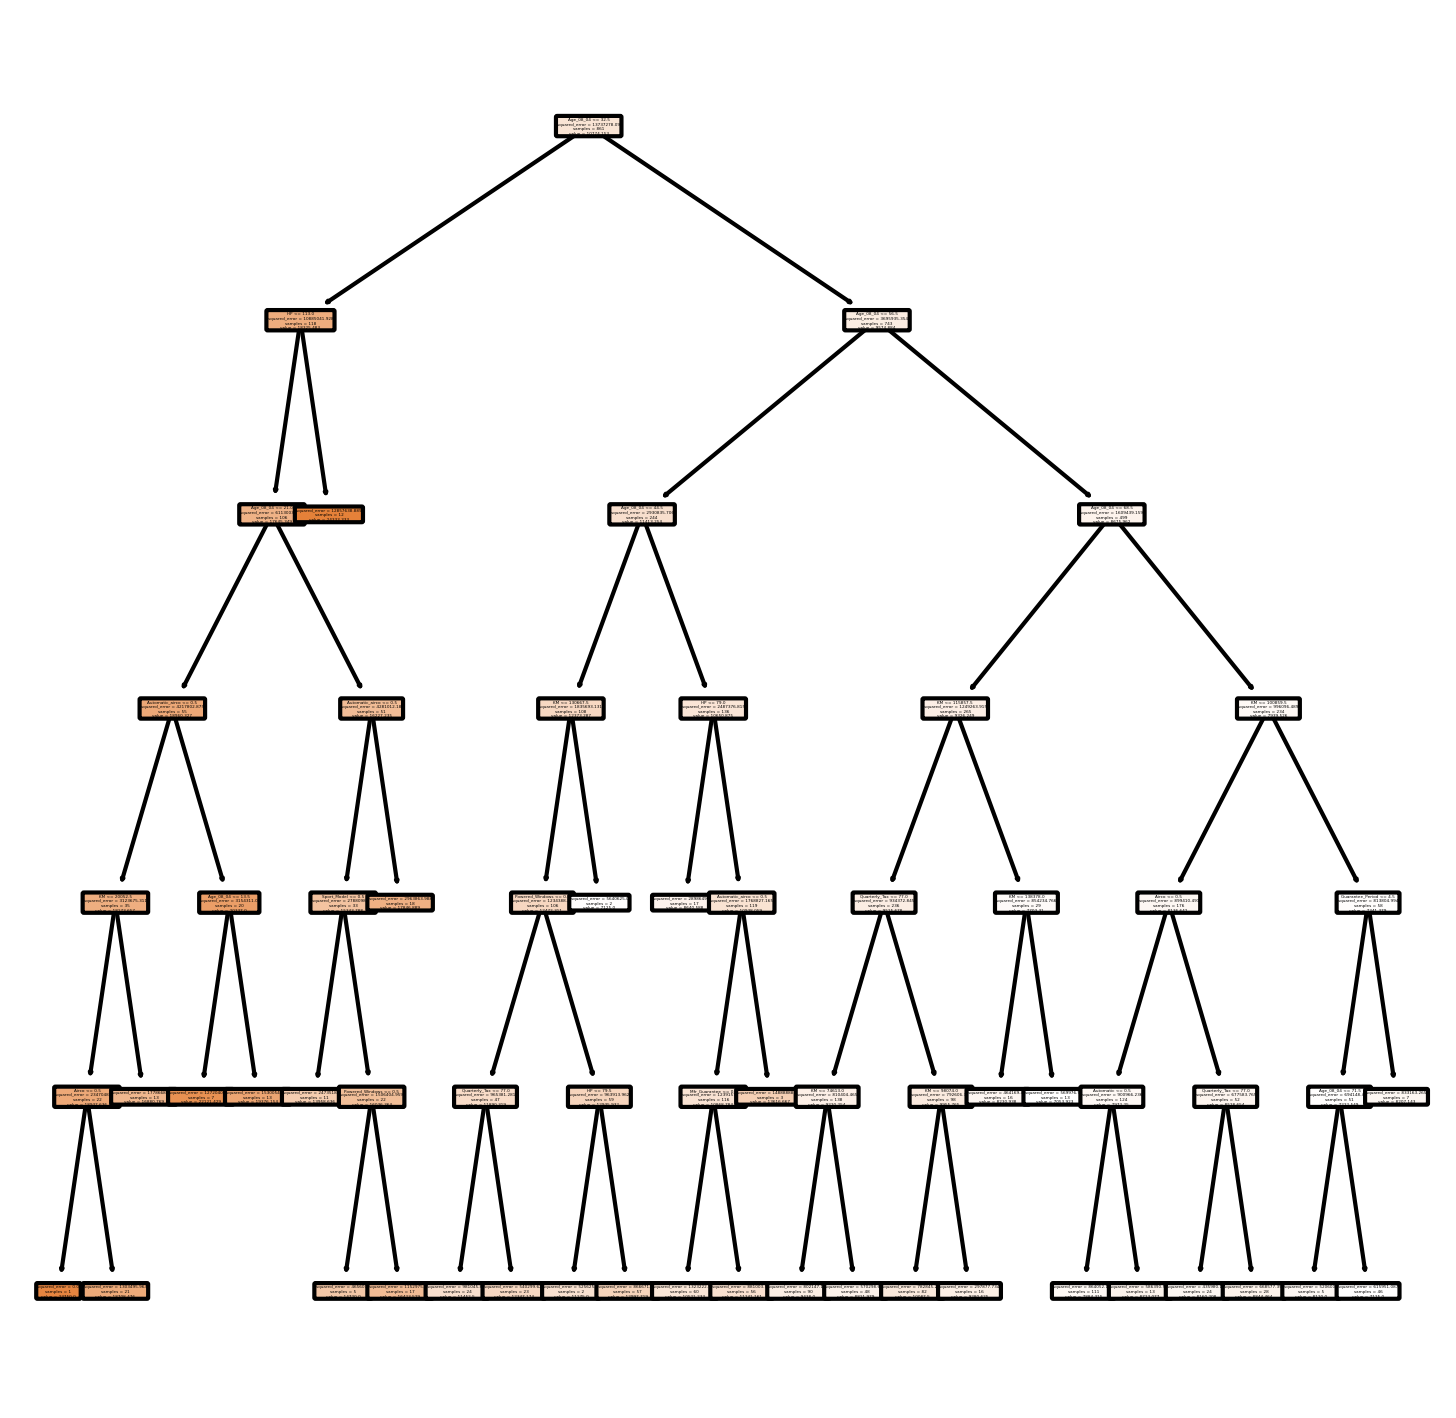

In [374]:
#plotDecisionTree
# Set dpi (300) to make image clearer
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(regTree, 
               feature_names=train_X.columns, 
               filled = True,rounded=True);
plt.show()

In [375]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': regTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,features,importance
0,Age_08_04,0.894681
2,HP,0.052419
1,KM,0.021720
9,Automatic_airco,0.014292
5,Quarterly_Tax,0.004294
11,Powered_Windows,0.003680
8,Airco,0.003291
12,Sport_Model,0.002926
6,Mfr_Guarantee,0.001388
3,Automatic,0.000757


i - The four most important predictors appear to be: Age_08_04, HP (horse power), Km, and Automatic_airco (air conditioner)
ii - from the regression tree summary we can see that RMS of the training set is 1082.70, while RMS of the validation set is: 1251.39. This is something that occurs easily since the model has been trained on the training set so it reflects a (small) part of the noise in that set and hence it shows smaller errors than it shows on new data.
iii - We could perform cross-validation, in that way we would reduce the risk of overfitting and improve the model's performance on the validation set and prediction power.

iv

In [376]:
#partition the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [377]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [378]:
regTree = gridSearch.best_estimator_

In [379]:
#regression tree summary stats for training and validation
print("training summary")
regressionSummary(train_y, regTree.predict(train_X))

print("\nvalidation summary")
regressionSummary(valid_y, regTree.predict(valid_X))

training summary

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1082.6992
            Mean Absolute Error (MAE) : 786.5953
          Mean Percentage Error (MPE) : -0.9986
Mean Absolute Percentage Error (MAPE) : 7.6224

validation summary

Regression statistics

                      Mean Error (ME) : 24.8976
       Root Mean Squared Error (RMSE) : 1251.3861
            Mean Absolute Error (MAE) : 958.1684
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.5594


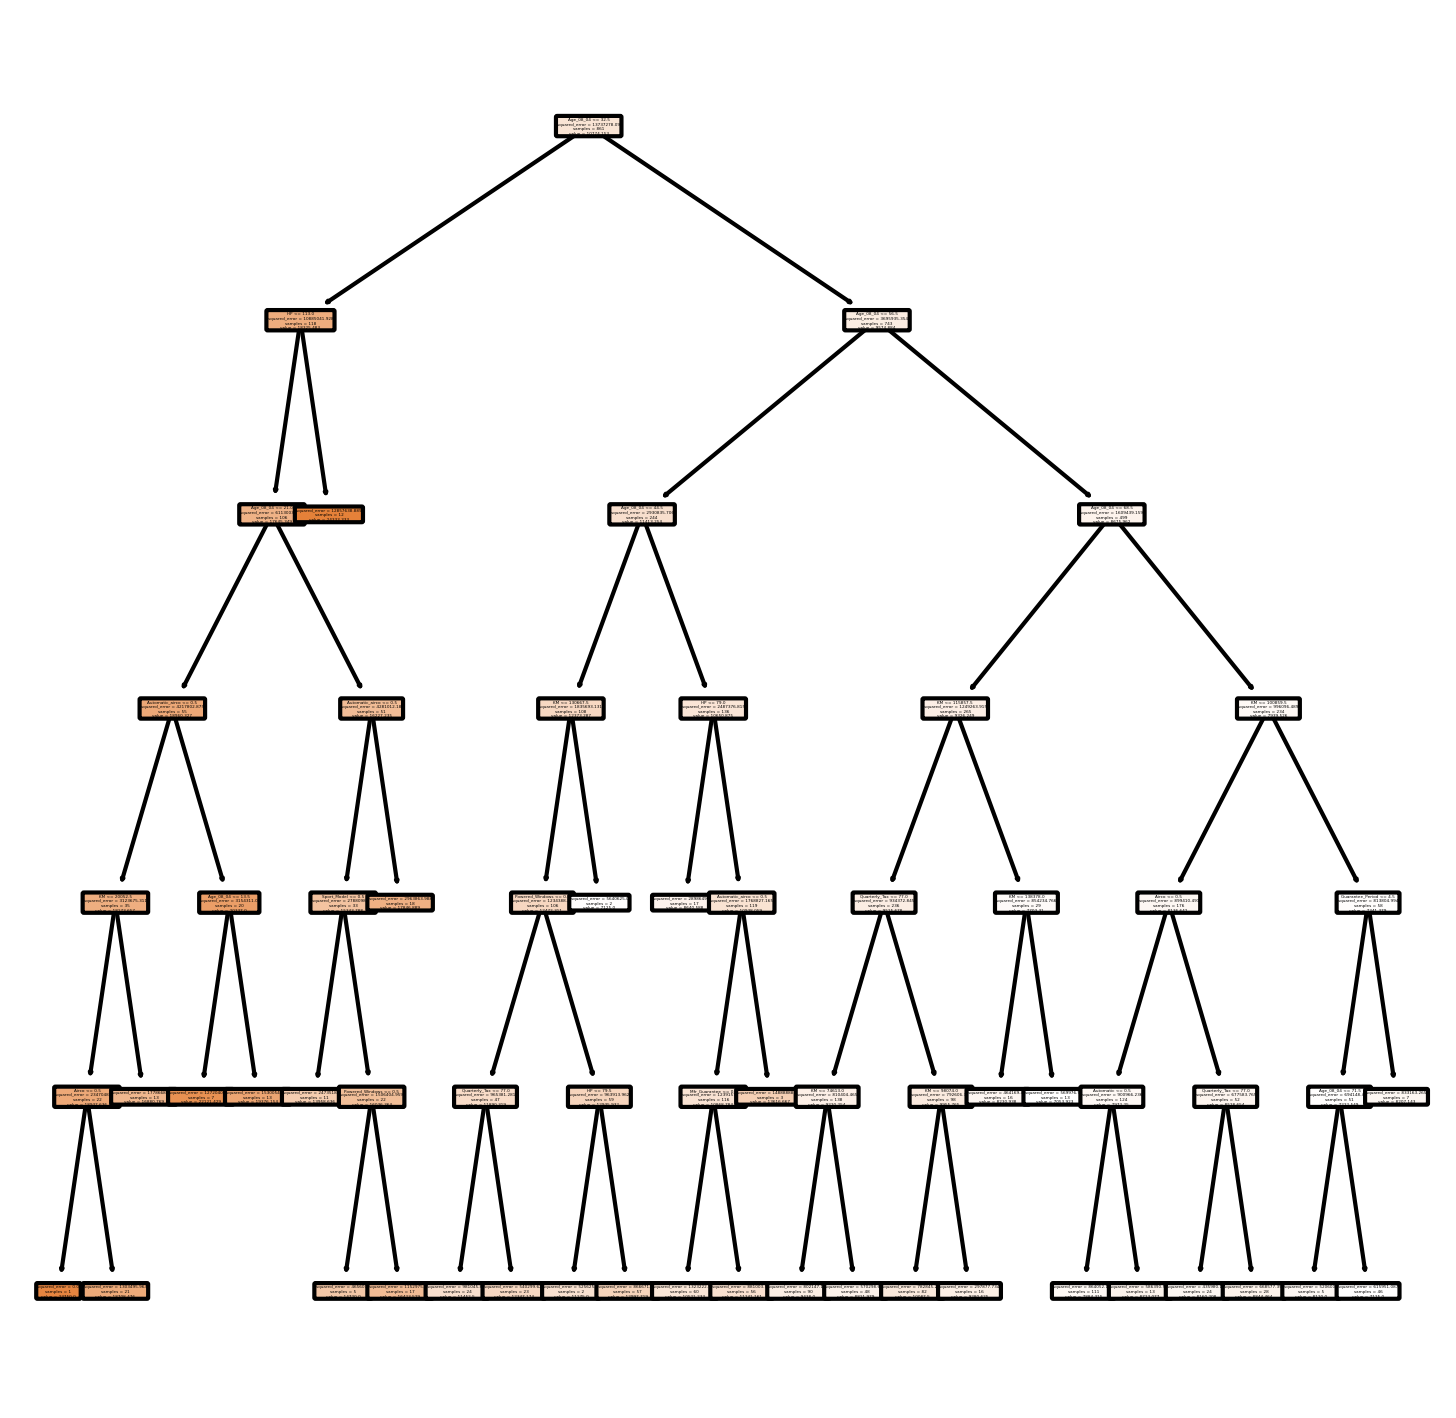

In [380]:
#plotDecisionTree
# Set dpi (300) to make image clearer
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(regTree, 
               feature_names=train_X.columns, 
               filled = True,rounded=True);
plt.show()